In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import requests
import json
import time
import os
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup


from IPython.core.display import HTML, display

In [2]:
m_url='https://worldpopulationreview.com/world-cities/prague-population'
m_url

'https://worldpopulationreview.com/world-cities/prague-population'

In [4]:
r = requests.get(m_url)
r.status_code

200

In [5]:
m_soup = BeautifulSoup(r.text,'html')
#print(m_soup.prettify())

In [6]:
m_country = m_soup.find('script',id="__NEXT_DATA__",type="application/json")

In [7]:
m_str=m_country.string

In [8]:
m_j=json.loads(m_str)

In [11]:
m_j.shape

AttributeError: 'dict' object has no attribute 'shape'

In [12]:
js2=m_j['props']['pageProps']['yearData']
js2[0]

{'Growth': 0, 'GrowthRate': 0, 'Population': 934789, 'Year': 1950}

'Albania'

In [13]:
m_pd2=pd.DataFrame(js2)
#m_pd2.rename(columns={'Name':'City','Prev':'LastYear'},inplace=True)
m_pd2.head(5)

,Growth,GrowthRate,Population,Year
0,0,0.000000,934789,1950
1,6402,0.006849,941191,1951
2,6455,0.006858,947646,1952
3,6482,0.006840,954128,1953
4,6534,0.006848,960662,1954


In [16]:
m_pd2 = m_pd2.set_index('Year')
m_pd2.head()

,Growth,GrowthRate,Population
Year,,,
1950,0,0.000000,934789
1951,6402,0.006849,941191
1952,6455,0.006858,947646
1953,6482,0.006840,954128
1954,6534,0.006848,960662


In [30]:
#m_yd = m_pd2.loc[1970:2021].sort_index(ascending=False)
m_yd = m_pd2.loc[1960:2021].sort_index(ascending=False)
m_yd.head()

,Growth,GrowthRate,Population
Year,,,
2021,6462,0.004949,1312199
2020,6933,0.005338,1305737
2019,7252,0.005615,1298804
2018,7390,0.005755,1291552
2017,7348,0.005755,1284162


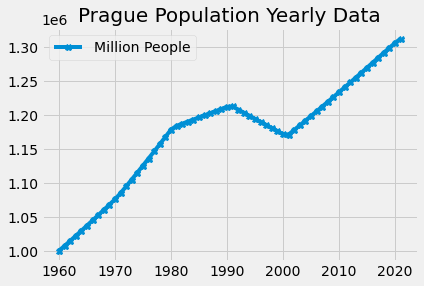

In [31]:
plt.style.use('fivethirtyeight')
plt.plot(m_yd.index,m_yd.Population,label="Million People",marker='X')
#plt.plot(df4.C,df4.D,label="CD",linewidth=5, marker='X')
#plt.xlabel("X_label")
#plt.ylabel("Y_label")
plt.title("Prague Population Yearly Data",fontsize=20)
plt.legend(loc='best')
#plt.text(2,6,"I am here")
#plt.style.use('ggplot')
